Andrea Piredda - 61801

# Advanced Data Analysis - Assignment 3

This notebook contains the proposed solution for **Assignment 3** of the Advanced Data Analysis course.


### DEADLINE: 11-November-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want.

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* The notebook should be delivered with the outputs already available


# Group I

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class means whether a patient has breast cancer or not. The two categories are: malignant and benign.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).


In [1]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = os.path.join( "breastcancer.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Question 1 (5 points out of 20)

Project the thirty-dimensional Breast Cancer data to two-dimensional principal components. Use PCA and tSNE approaches. For each approach plot the result and then compare them.


Additionally help:
For this dataset, it is important to normalize the input features but this topic was not discuss in class.

To do so, before applying the fit_transform function run this piece of code:

features = StandardScaler().fit_transform(features). (replace features by the name of your variable)

C:\Users\HEW15DW1083NL\AppData\Local\Temp\ipykernel_35688\3604890886.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


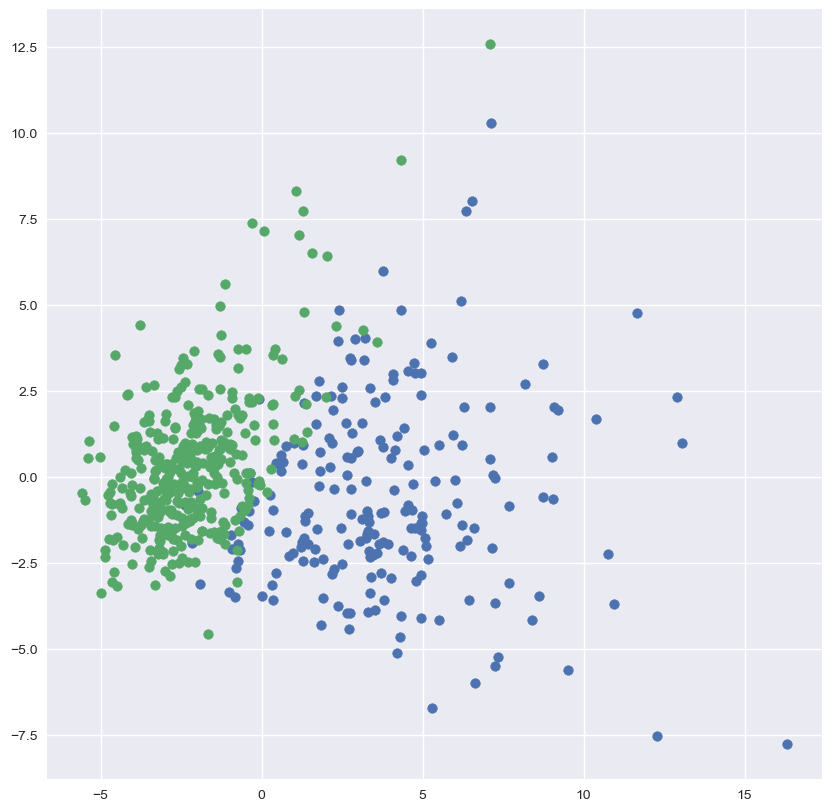

In [2]:
#TODO
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use("seaborn")
#target = dataDF['diagnosis']
features = dataDF.loc[:, 'radius_mean': 'fractal_dimension_worst'].values

#PCA
pca = PCA(n_components=2)
features = StandardScaler().fit_transform(features)
pca_result = pca.fit_transform(features)
plt.figure(figsize = (10, 10))
for diagnosis in dataDF["diagnosis"].unique():
    mask = dataDF["diagnosis"] == diagnosis
    plt.scatter(pca_result[mask, 0], pca_result[mask, 1], label=diagnosis)


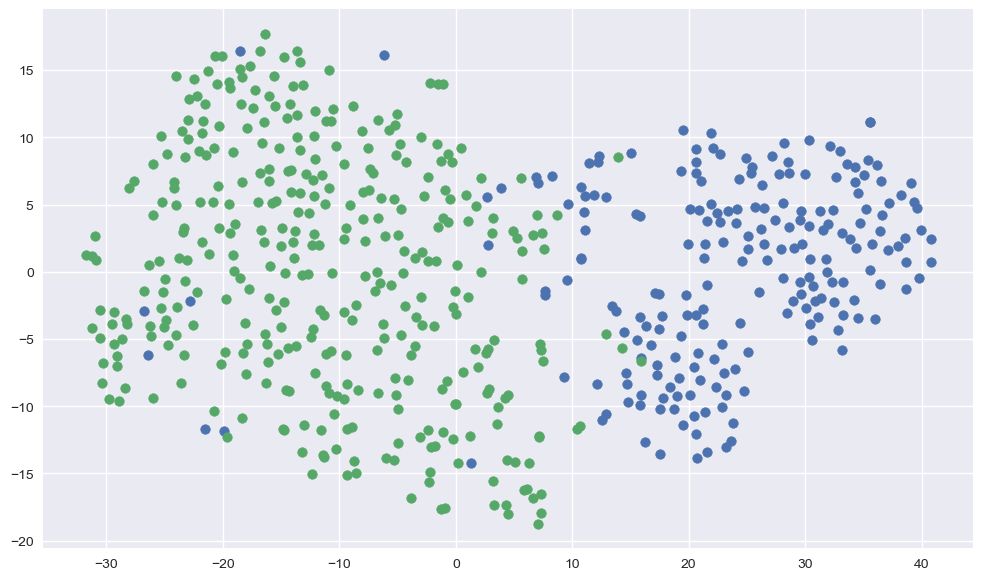

In [3]:
#tSNE
from sklearn.manifold import TSNE
tsne_result = TSNE(n_components = 2).fit_transform(features)
plt.figure(figsize=(12,7))
for diagnosis in dataDF["diagnosis"].unique():
    mask = dataDF["diagnosis"] == diagnosis
    plt.scatter(tsne_result[mask,0],tsne_result[mask,1], marker = "o", label=diagnosis)

## Question 2 ( 1 points out of 20)

What can you tell about the two types of tumors? Are they easily differentiated by the features computed from a digitized image? Why?

Based on the PCA and t-SNE visualizations, there is a distinct separation between the two types of tumors, indicating that the features computed from the digitized images are effective in differentiating between them. PCA captures the most variance and shows clear grouping, suggesting significant differences in the features corresponding to each tumor type. The t-SNE visualization further confirms this by revealing clusters with little overlap, which indicates that even in a complex, non-linear manifold, the tumor types are distinct. Therefore, these features are likely to be useful predictors for tumor classification tasks.

# Group II

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012. For answering the following questions, you can use or adapt any code from the lectures or exercises
if you want.


In [4]:
dataFileName = "internet.csv"
dataDF = pd.read_csv(dataFileName)

In [5]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF.index
dataset_df['n_users'] = dataDF['n_users']
dataset_df.head(20)

,year,n_users
0,0,16
1,1,36
2,2,70
3,3,147
4,4,248
5,5,361
6,6,719
7,7,817
8,8,1018
9,9,1093


## Question 1 (6 points out of 20)

In lecture 6, we used the logistic function with an offset parameter to better fit the curve to some arbitrary starting point:

![image.png](attachment:image.png)

Fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, display the parameters found for the logistic model and explain the meaning of each one.  

Note: I suggest you use these starting values for the minimization: L = 1000, x0 = 10, k = 0.1 and
o = −300. If you use other values the minimization may not converge properly.


L = 6,462.26
x0 = 15.22
k = 0.19
o = -384.73


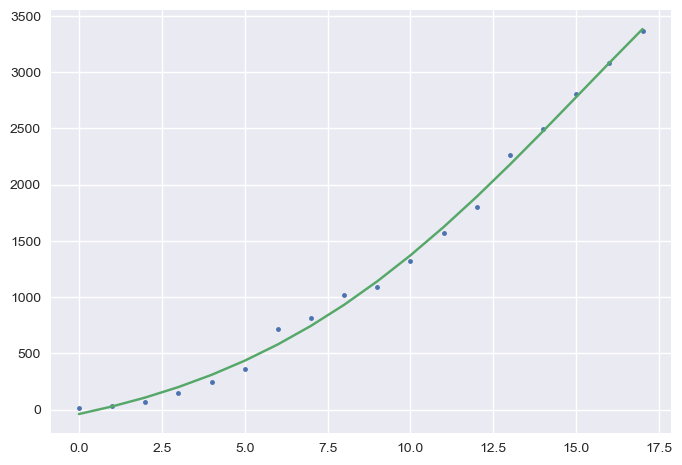

In [61]:
#TODO
from scipy.optimize import minimize
import numpy as np
def logistic(x, x0, L, k):
    return L/(1 + np.exp(-k*(x-x0)))

def log_cost(params, dataset_df):
    x0, L, k, o = params
    prediction = logistic(dataset_df.iloc[:, 0], x0, L, k) + o
    return np.mean((prediction - dataset_df.iloc[:, 1])**2)

initial_params = [10, 1000, 0.1, -300]
result = minimize(log_cost,initial_params, args = (dataset_df))
x0, L, k, offset = result.x
prediction = logistic(dataset_df.iloc[:, 0], x0, L, k) + offset
plt.plot(dataset_df.iloc[:,0],dataset_df.iloc[:,1],'.')
plt.plot(dataset_df.iloc[:,0],prediction)

print("L = {:,.2f}\nx0 = {:,.2f}\nk = {:,.2f}\no = {:,.2f}".format(L, x0, k, offset))


- *x0*: inflection point where the function shifts from concave to convex. 
- *L*: 'vertical' scaling parameter, representing the horizontal asymptote.
- *k*: 'horizontal' scaling parameter, affecting the rate of exponential growth.
- *offset*: graph 'vertical' shift, defining the function starting point.

## Question 2 (3 points out of 20)

Compute and plot the residuals of the model found. What can we tell about the model identified based on the Residual Plot? Is a logistic function a good option to model users' growth over time in our dataset?

Text(0, 0.5, 'Residuals')

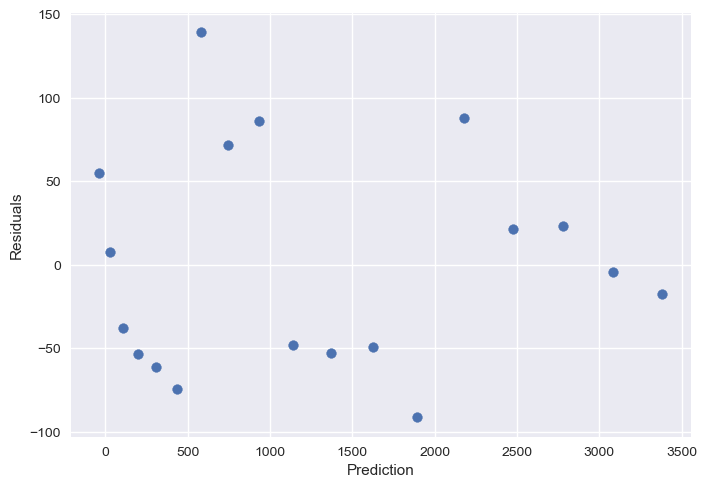

In [67]:
#TODO
residuals = dataset_df.iloc[:, 1] - prediction
plt.scatter(prediction, residuals, label="Residuals", marker="o")
plt.xlabel('Prediction')
plt.ylabel('Residuals')


- Residuals should be normally distributed with mean zero, which means they should be symmetrically distributed and tend to cluster towards the middle of the plot.
- There are not enough data points for us to conclude whether or not the model is appropriate.

## Question 3 (5 points out of 20)

Display the 95% interval for its parameters under the assumption that the random error affecting the data points comes from the same distribution for all points.

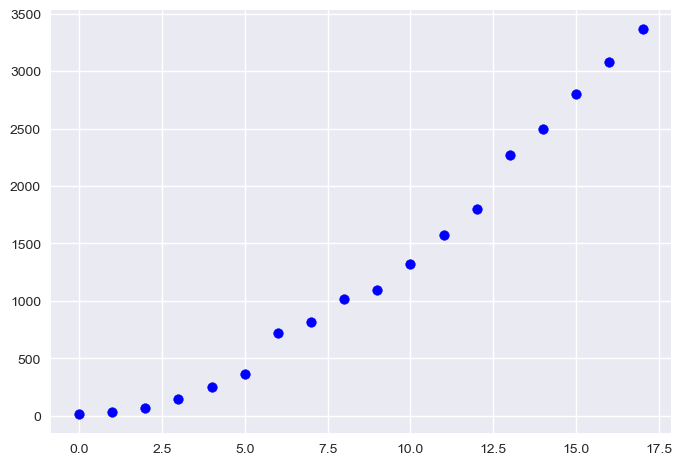

In [74]:
params = []
pred = logistic(dataset_df.iloc[:,0],x0,L,k) + offset

residual = dataset_df.iloc[:,1]-pred

plt.scatter(dataset_df.iloc[:,0], dataset_df.iloc[:,1], color='blue')
replicas = 100

df_unc = pd.DataFrame(dataset_df.iloc[:,0])

i = 0
for _ in range(replicas):

    rep_data = dataset_df.copy() 

    rep_data.iloc[:,1] = pred + residual*np.random.normal(size=dataset_df.shape[0])

    res=minimize(log_cost,initial_params,args=(rep_data))
    params.append(res.x)
    x0,L,k,offset = res.x
    pred_replica = logistic(dataset_df.iloc[:,0],x0,L,k)+offset

    df_unc =  pd.concat([df_unc, pred_replica], axis=1) 
    i = i + 1
    

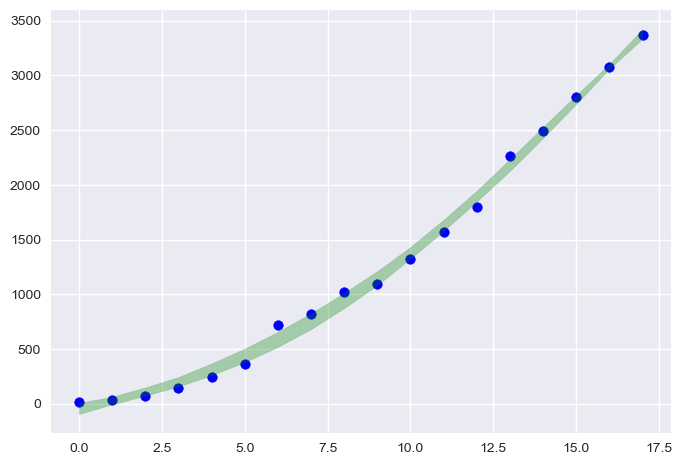

In [73]:
df_unc = df_unc.iloc[:, 1:replicas] 
plt.scatter(dataset_df.iloc[:,0], dataset_df.iloc[:,1], color='blue') 

df_unc['p2.5'] = df_unc.quantile(0.025, axis = 1,interpolation = 'midpoint')
df_unc['p975'] = df_unc.quantile(0.975, axis = 1,interpolation = 'midpoint')

plt.fill_between(dataset_df.iloc[:,0], df_unc[['p2.5']].iloc[:,0], df_unc[['p975']].iloc[:,0], color='green',alpha=0.3)


In [68]:
params_df = pd.DataFrame(params)
params_df.rename(columns={0: "x0", 1: "L", 2: "k", 3: "offset"},  inplace = True)
params_df.head()

,x0,L,k,offset
0,26.175572,16255.031193,0.107591,-1007.465319
1,15.932745,7001.762626,0.175670,-436.148558
2,15.283856,6458.119772,0.192530,-367.836704
3,16.917339,7835.709669,0.159917,-574.515465
4,16.314197,7281.864549,0.169952,-468.136670


In [69]:
# Lower Bounds
params_df.quantile(0.025, interpolation = 'midpoint') 

x0          13.122665
L         5010.026742
k            0.120631
offset    -857.112665
Name: 0.025, dtype: float64

In [70]:
# Upper Bounds
params_df.quantile(0.975, interpolation = 'midpoint') 

x0           23.574286
L         13761.184074
k             0.238022
offset     -197.958133
Name: 0.975, dtype: float64